<a href="https://colab.research.google.com/github/Zeeshan-jamal/cse445_final_assignment/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Assignment on Heart Disease detection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


#### Import of all the required libraries

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
%matplotlib inline
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


#### a)  Read the dataset using panda's dataframe.


In [ ]:
# df = pd.read_csv('heart.csv')
df = pd.read_csv('/content/drive/MyDrive/11th semester/cse445/final assignment/heart.csv')

#### b) Find out the number of instances and the number of features (including the target class) in the dataset.

In [ ]:
df.shape

(303, 14)

#### c) Show the first five rows of the *dataset*

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### d) Print the number of missing entries (i.e. the number of null values) per feature. If there exists any missing entries, replace the value with that particular feature's mean

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isin(['	?']).sum() #data which includes the '?' sign

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isin([' ']).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### e) Print the number of unique values per feature. If the number of unique values for any feature is less than 10, print those unique feature values.

In [ ]:
for column in df:
  unique_vals=np.unique(df[column])
  n_unique_vals=len(unique_vals)
  if(n_unique_vals<10):
    print('The number of unique values for feature {}: {} --{}'.format(column, n_unique_vals,unique_vals))
  else:
    print('The number of unique values for feature {}: {}'.format(column, n_unique_vals))


The number of unique values for feature age: 41
The number of unique values for feature sex: 2 --[0 1]
The number of unique values for feature cp: 4 --[0 1 2 3]
The number of unique values for feature trestbps: 49
The number of unique values for feature chol: 152
The number of unique values for feature fbs: 2 --[0 1]
The number of unique values for feature restecg: 3 --[0 1 2]
The number of unique values for feature thalach: 91
The number of unique values for feature exang: 2 --[0 1]
The number of unique values for feature oldpeak: 40
The number of unique values for feature slope: 3 --[0 1 2]
The number of unique values for feature ca: 5 --[0 1 2 3 4]
The number of unique values for feature thal: 4 --[0 1 2 3]
The number of unique values for feature target: 2 --[0 1]


#### f) Generate a boxplot that shows the gender-wise age distribution. Show the boxplot for target = 0 as well as target = 1. The following is the boxplot you will get

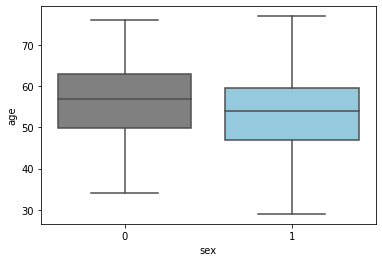

In [ ]:
pal=['grey','skyblue']
g=sns.boxplot(x='sex',y='age',data=df,palette=pal)

#### g) Now, generate a boxplot that shows the chestpain-wise age distribution. Show
the boxplot for target = 0 as well as target = 1

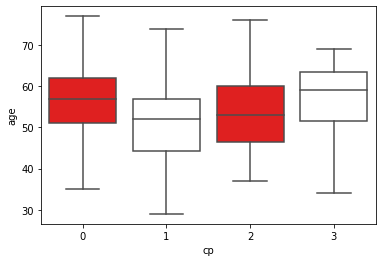

In [ ]:
pal=['red','white']
g=sns.boxplot(x='cp',y='age',data=df,palette=pal)

#### h) Generate lmplot to show how cholestoral varies with age. Draw separate lmplots for different gender. 5 marks


#### i) Generate a heatmap showing correlation between all features 3 marks

#### j) Scale all the features between 0 and 1 5 marks


#### k) You are going to predict the “target”. Use 10 fold cross-validation to predict the target. Use the classifiers ZeroR, KNN, SVM, logistic regression and Decision Tree and for each of them, report the accuracy, precision, recall, roc area and f1 score along with the standard deviation of each of them